<a href="https://colab.research.google.com/github/muniappabalaji/TimeSeries/blob/main/Great_Learning_TSA_August2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the data and libraries
2. Exploratory Data Analysis
3. Stationarize the data
4. Apply VAR Model
5. Interpret the dianostics

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

Load the data

In [35]:
m2sl_df = pd.read_csv('/content/M2SLMoneyStock.csv')
pce_df = pd.read_csv('/content/PCEPersonalSpending.csv')

In [36]:
m2sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Money   252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [37]:
pce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      252 non-null    object 
 1   Spending  252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


Merged DF

In [38]:
merged_df = pd.merge(m2sl_df, pce_df, on='Date')

In [39]:
display(merged_df.head())
display(merged_df.tail())

,Date,Money,Spending
0,1/1/1995,3492.4,4851.2
1,2/1/1995,3489.9,4850.8
2,3/1/1995,3491.1,4885.4
3,4/1/1995,3499.2,4890.2
4,5/1/1995,3524.2,4933.1


,Date,Money,Spending
247,8/1/2015,12096.8,12394.0
248,9/1/2015,12153.8,12392.8
249,10/1/2015,12187.7,12416.1
250,11/1/2015,12277.4,12450.1
251,12/1/2015,12335.9,12469.1


Plot the data

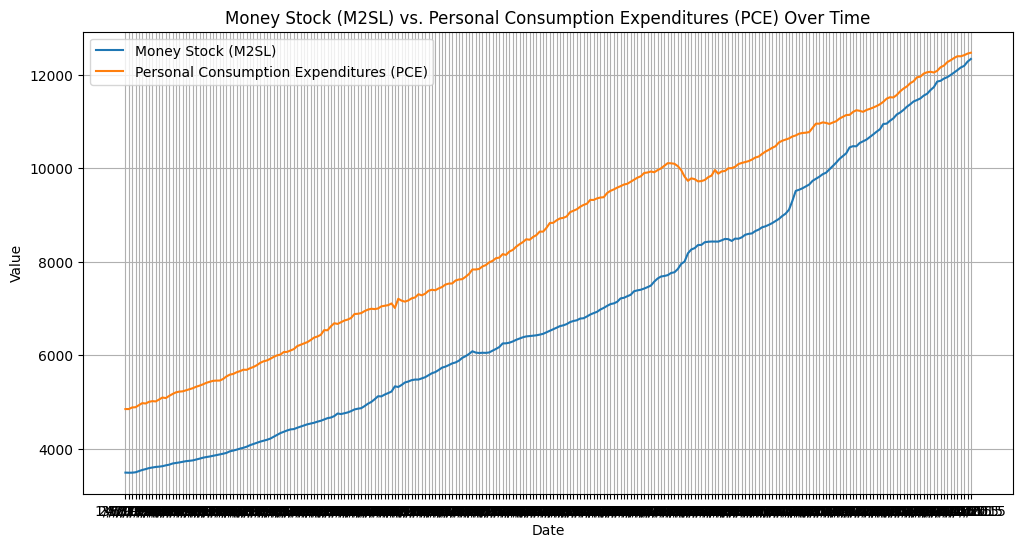

In [40]:
# Plotting both series together
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Money'], label='Money Stock (M2SL)')
plt.plot(merged_df['Date'], merged_df['Spending'], label='Personal Consumption Expenditures (PCE)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Money Stock (M2SL) vs. Personal Consumption Expenditures (PCE) Over Time')
plt.legend()
plt.grid(True)
plt.show()

Evaluating the data

In [41]:
from scipy import stats
midpoint = len(merged_df)//2

In [42]:
first_half = merged_df.iloc[0:midpoint].copy()
second_half = merged_df.iloc[midpoint:].copy()

In [43]:
# Convert 'Date' to datetime objects for plotting
first_half['Date'] = pd.to_datetime(first_half['Date'])
second_half['Date'] = pd.to_datetime(second_half['Date'])

Boxplot to compare the 2 halves

/tmp/ipython-input-1214938445.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([first_half['Money'], second_half['Money']], labels=['First Half', 'Second Half'])
/tmp/ipython-input-1214938445.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([first_half['Spending'], second_half['Spending']], labels=['First Half', 'Second Half'])


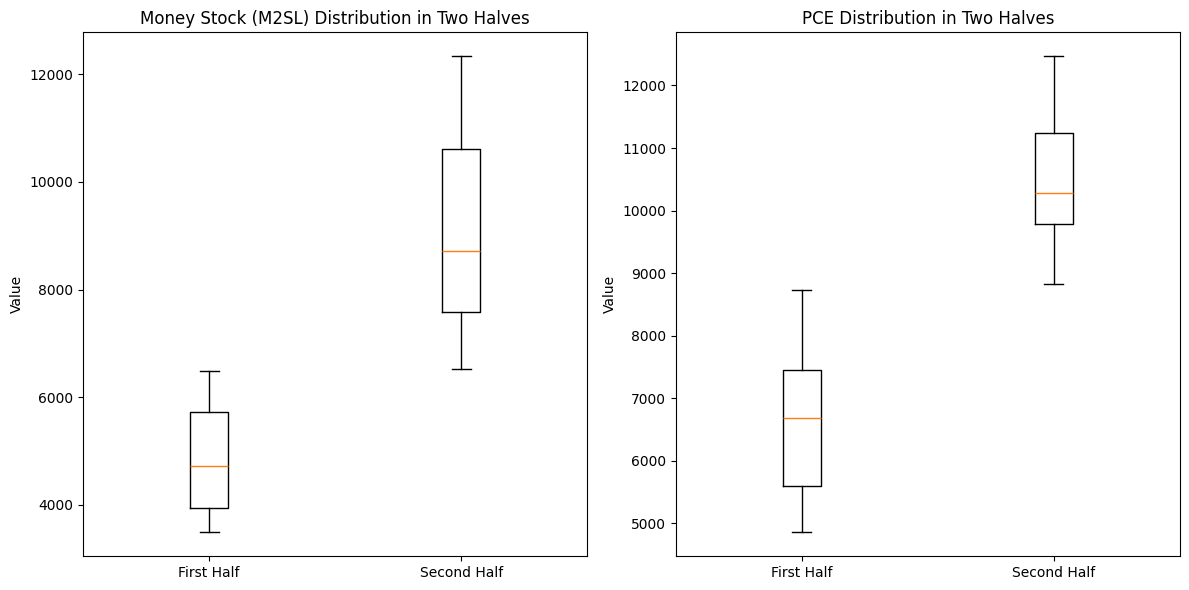

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot([first_half['Money'], second_half['Money']], labels=['First Half', 'Second Half'])
plt.title('Money Stock (M2SL) Distribution in Two Halves')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.boxplot([first_half['Spending'], second_half['Spending']], labels=['First Half', 'Second Half'])
plt.title('PCE Distribution in Two Halves')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

T test
* H0: Mu1 = Mu2
* H1: Mu1 =! Mu2

In [45]:
ttest_spending = stats.ttest_ind(first_half['Spending'], second_half['Spending'])
print(f"T-test for Personal Consumption Expenditures (PCE) - p-value: {ttest_spending.pvalue:.4f}")


T-test for Personal Consumption Expenditures (PCE) - p-value: 0.0000


ADF Test

* Ho: Time Series non stationary
* H1: Time Series is stationary

In [46]:
adffuller_test = adfuller(merged_df['Spending'])
print(f"ADF Test for Personal Consumption Expenditures (PCE) - p-value: {adffuller_test[1]:.4f}")

ADF Test for Personal Consumption Expenditures (PCE) - p-value: 0.9693


In [47]:
adffuller_test = adfuller(merged_df['Money'])
print(f"ADF Test for Money - p-value: {adffuller_test[1]:.4f}")

ADF Test for Money - p-value: 1.0000


Stationarize the data

In [48]:
merged_df['Money_Diff_1'] = merged_df['Money'].diff()

In [49]:
adffuller_test = adfuller(merged_df['Money_Diff_1'].dropna())
print(f"ADF Test for Money - p-value: {adffuller_test[1]:.4f}")

ADF Test for Money - p-value: 0.2620


In [50]:
merged_df['Money_Diff_2'] = merged_df['Money_Diff_1'].diff()

In [51]:
adffuller_test = adfuller(merged_df['Money_Diff_2'].dropna())
print(f"ADF Test for Money - p-value: {adffuller_test[1]:.4f}")

ADF Test for Money - p-value: 0.0000


Stationarity for Spending

In [62]:
# adffuller_test = adfuller(merged_df['Spending'])
# print(f"ADF Test for Personal Consumption Expenditures (PCE) - p-value: {adffuller_test[1]:.4f}")

merged_df['Spending_diff_1'] = merged_df['Spending'].diff()

In [63]:
adffuller_test = adfuller(merged_df['Spending_diff_1'].dropna())
print(f"ADF Test for Spending - p-value: {adffuller_test[1]:.4f}")

ADF Test for Spending - p-value: 0.0000


In [64]:
merged_df

,Date,Money,Spending,Money_Diff_1,Money_Diff_2,Spending_Diff_1,Spending_diff_1
0,1/1/1995,3492.4,4851.2,NaN,NaN,NaN,NaN
1,2/1/1995,3489.9,4850.8,-2.5,NaN,-0.4,-0.4
2,3/1/1995,3491.1,4885.4,1.2,3.7,34.6,34.6
3,4/1/1995,3499.2,4890.2,8.1,6.9,4.8,4.8
4,5/1/1995,3524.2,4933.1,25.0,16.9,42.9,42.9
...,...,...,...,...,...,...,...
247,8/1/2015,12096.8,12394.0,51.5,-0.7,38.6,38.6
248,9/1/2015,12153.8,12392.8,57.0,5.5,-1.2,-1.2
249,10/1/2015,12187.7,12416.1,33.9,-23.1,23.3,23.3
250,11/1/2015,12277.4,12450.1,89.7,55.8,34.0,34.0


Recursive VAR Model to check the model lag with lowest AIC (Low AIC = Good Model)

Train Test Split

In [65]:
test_obs = 12

train_money = merged_df['Money_Diff_2'][:-test_obs].dropna()
test_money = merged_df['Money_Diff_2'][-test_obs:].dropna()

In [66]:
train_spending = merged_df['Spending_diff_1'][:-test_obs].dropna()
test_spending = merged_df['Spending_diff_1'][-test_obs:].dropna()

In [67]:
train_data = pd.concat([train_money, train_spending], axis=1).dropna()
train_data.columns =['Money_Diff_2', 'Spending_Diff_1']

In [68]:
train_data.head()

,Money_Diff_2,Spending_Diff_1
2,3.7,34.6
3,6.9,4.8
4,16.9,42.9
5,-0.3,44.4
6,-6.2,-7.3


Model Fit across different Lag Values for Evaluation

In [70]:
max_p = 10
for i in range(1, max_p+1):
  model = VAR(train_data)
  results = model.fit(i)
  print(f"Lag: {i}, AIC: {results.aic}")

Lag: 1, AIC: 13.893730044437806
Lag: 2, AIC: 13.788978767127503
Lag: 3, AIC: 13.800828407726483
Lag: 4, AIC: 13.705254945442732
Lag: 5, AIC: 13.702894884622165
Lag: 6, AIC: 13.716410512160271
Lag: 7, AIC: 13.722469221920354
Lag: 8, AIC: 13.72242698338018
Lag: 9, AIC: 13.706168588518498
Lag: 10, AIC: 13.744769881188871


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

From the above results, Run-5 Lags are optimal for the given data

In [77]:
model_fitted = VAR(train_data).fit(5)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Aug, 2025
Time:                     11:03:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.0287
Nobs:                     233.000    HQIC:                   13.8343
Log likelihood:          -2235.61    FPE:                    893620.
AIC:                      13.7029    Det(Omega_mle):         814863.
--------------------------------------------------------------------
Results for equation Money_Diff_2
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -1.884757         3.499904           -0.539           0.590
L1.Money_Diff_2           -0.643407         0.068285           -9.422           0.000
L1.Spending_Diff_1        -0.0872

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Forecast to Future

In [79]:
lag_order = 5
forecast_input = train_data.values[-lag_order:]
forecasts = model_fitted.forecast(y=forecast_input, steps=test_obs)

In [80]:
forecasts

array([[-16.62527587,  38.7736746 ],
       [ -4.46489191,  25.66263029],
       [  3.53309486,  24.9763978 ],
       [ -6.17365867,  25.86375869],
       [  4.35101227,  28.1454302 ],
       [  2.93857276,  31.03568262],
       [ -3.54876107,  30.32366909],
       [  0.71193467,  30.57144685],
       [  0.45476937,  30.3643308 ],
       [ -0.74984293,  29.82004801],
       [  1.18548365,  30.62453346],
       [  0.36154642,  30.78437355]])

Put it into DataFrame

In [81]:
forecasts_df = pd.DataFrame(forecasts, columns= ['Money_Diff_2_forecast','Spending_diff_1_forecast'], index=test_money.index)

In [82]:
forecasts_df

,Money_Diff_2_forecast,Spending_diff_1_forecast
240,-16.625276,38.773675
241,-4.464892,25.662630
242,3.533095,24.976398
243,-6.173659,25.863759
244,4.351012,28.145430
245,2.938573,31.035683
246,-3.548761,30.323669
247,0.711935,30.571447
248,0.454769,30.364331
249,-0.749843,29.820048


In [83]:
test_money

,Money_Diff_2
240,-15.5
241,56.1
242,-102.8
243,30.9
244,-15.8
245,14.0
246,6.7
247,-0.7
248,5.5
249,-23.1


In [84]:
test_spending

,Spending_diff_1
240,-16.0
241,36.4
242,75.9
243,35.5
244,74.3
245,40.2
246,47.1
247,38.6
248,-1.2
249,23.3


**Evaluate the Model**

In [85]:
from sklearn.metrics import mean_squared_error

In [87]:
mse_money = mean_squared_error(test_money, forecasts_df['Money_Diff_2_forecast'])
mse_spending = mean_squared_error(test_spending, forecasts_df['Spending_diff_1_forecast'])
rmse_money = np.sqrt(mse_money)
rmse_spending = np.sqrt(mse_spending)

In [88]:
print(f"MSE for Money: {mse_money:.4f}")
print(f"RMSE for Money: {rmse_money:.4f}")
print(f"MSE for Spending: {mse_spending:.4f}")
print(f"RMSE for Spending: {rmse_spending:.4f}")

MSE for Money: 1790.8221
RMSE for Money: 42.3181
MSE for Spending: 795.8943
RMSE for Spending: 28.2116


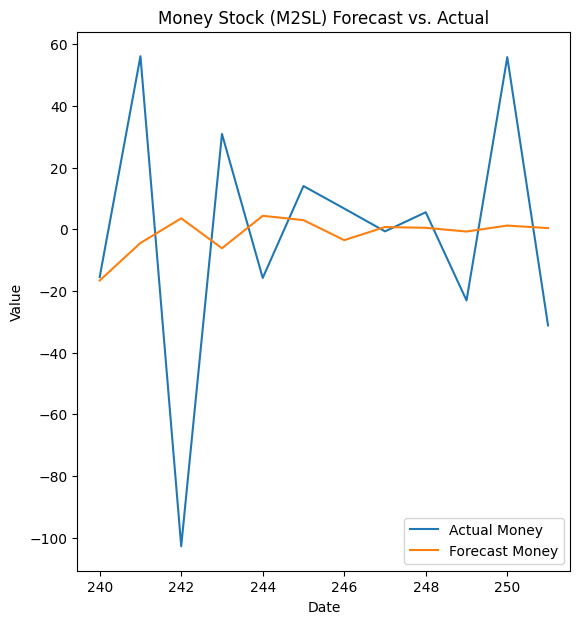

In [89]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plt.plot(test_money.index, test_money, label='Actual Money')
plt.plot(test_money.index, forecasts_df['Money_Diff_2_forecast'], label='Forecast Money')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Money Stock (M2SL) Forecast vs. Actual')
plt.legend()

`plt.tight_layout()` automatically adjusts subplot parameters to give a tight layout. This prevents labels and titles from overlapping and generally makes the plot look cleaner and more organized.

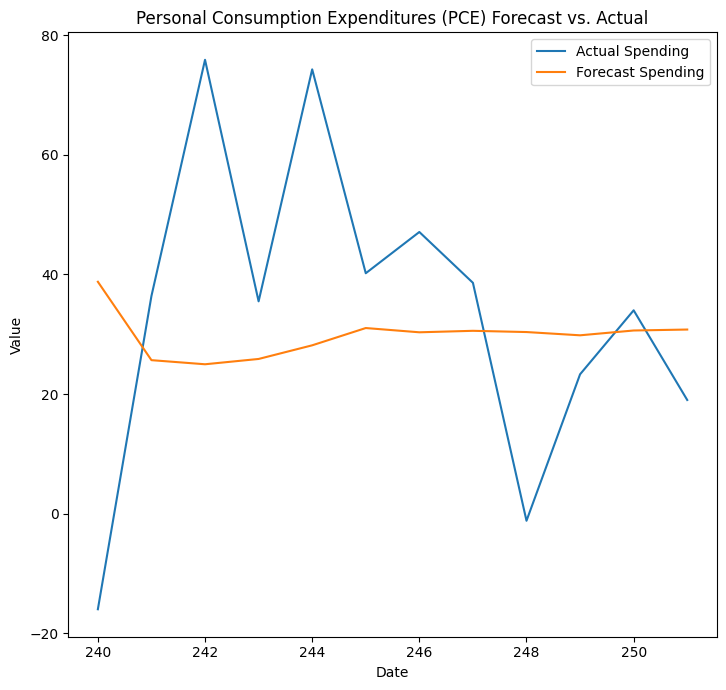

In [92]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.plot(test_spending.index, test_spending, label='Actual Spending')
plt.plot(test_spending.index, forecasts_df['Spending_diff_1_forecast'], label='Forecast Spending')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Personal Consumption Expenditures (PCE) Forecast vs. Actual')
plt.legend()
plt.tight_layout()
plt.show()

Forecast the values to the original scale

Apply cumulative sum on the Forecasts to return to the original scale

In [97]:
last_money_diff_1_train = merged_df['Money_Diff_1'].iloc[train_money.index[-1]]

In [98]:
forecast_money_diff_1 = forecasts_df['Money_Diff_2_forecast'].cumsum() + last_money_diff_1_train

In [99]:
last_money_diff_train = merged_df['Money'].iloc[train_money.index[-1]]

In [101]:
forecast_money_original = forecast_money_diff_1.cumsum() + last_money_diff_train

Spending

In [106]:
last_spending_train = merged_df['Spending'].iloc[train_spending.index[-1]-1]
forecast_spending_original = forecasts_df['Spending_diff_1_forecast'].cumsum()+last_spending_train
forecast_spending_original

,Spending_diff_1_forecast
240,12090.173675
241,12115.836305
242,12140.812703
243,12166.676461
244,12194.821892
245,12225.857574
246,12256.181243
247,12286.752690
248,12317.117021
249,12346.937069


In [110]:
merged_df['Spending'].tail()

,Spending
247,12394.0
248,12392.8
249,12416.1
250,12450.1
251,12469.1


concatenate into single dataframe

In [111]:
original_scale_forecats_df = pd.DataFrame({'Money_Forecast_Original_Scale': forecast_money_original,
                                          'Spending_Forecast_Originial_Scale': forecast_spending_original})

In [112]:
original_scale_forecats_df

,Money_Forecast_Original_Scale,Spending_Forecast_Originial_Scale
240,11732.074724,12090.173675
241,11789.584556,12115.836305
242,11850.627483,12140.812703
243,11905.496752,12166.676461
244,11964.717033,12194.821892
245,12026.875886,12225.857574
246,12085.485978,12256.181243
247,12144.808005,12286.752690
248,12204.584802,12317.117021
249,12263.611755,12346.937069
